### Import modules

# Babymoons
#### Code Louisville Data Analysis 2 Project

In [32]:
import pandas as pd
import seaborn as sns
from datetime import datetime

## Feature 1: Loading Data
### Read at least two data files
3 csv files are used here

In [2]:
moon_df = pd.read_csv('full-moon-calendar-1900-2050/full_moon.csv')
births1_df = pd.read_csv('fivethirtyeight-births-dataset/US_births_1994-2003_CDC_NCHS.csv')
births2_df = pd.read_csv('fivethirtyeight-births-dataset/US_births_2000-2014_SSA.csv')

print('moon_df:\n', moon_df.head(),
    '\n\nbirths1_df:\n', births1_df.head(),
    '\n\nbirths2_df:\n', births2_df.head()
)

moon_df:
          Day               Date          Time
0     Monday    15 January 1900   08:07:30 pm
1  Wednesday   14 February 1900   02:50:12 pm
2     Friday      16 March 1900   09:11:48 am
3     Sunday      15 April 1900   02:02:06 am
4     Monday        14 May 1900   04:36:36 pm 

births1_df:
    year  month  date_of_month  day_of_week  births
0  1994      1              1            6    8096
1  1994      1              2            7    7772
2  1994      1              3            1   10142
3  1994      1              4            2   11248
4  1994      1              5            3   11053 

births2_df:
    year  month  date_of_month  day_of_week  births
0  2000      1              1            6    9083
1  2000      1              2            7    8006
2  2000      1              3            1   11363
3  2000      1              4            2   13032
4  2000      1              5            3   12558


## Feature 2: Clean and operate on the data while combining them
### Clean Data
##### Check dataframes for null values

In [3]:
print(
    'births1_df nulls:\n', births1_df[births1_df.isna().any(axis=1)],
    '\n\nbirths2_df nulls:\n', births2_df[births2_df.isna().any(axis=1)],
    '\n\nmoon_df nulls:\n', moon_df[moon_df.isna().any(axis=1)]
)

births1_df nulls:
 Empty DataFrame
Columns: [year, month, date_of_month, day_of_week, births]
Index: [] 

births2_df nulls:
 Empty DataFrame
Columns: [year, month, date_of_month, day_of_week, births]
Index: [] 

moon_df nulls:
 Empty DataFrame
Columns: [Day,  Date,  Time]
Index: []


No null values found

##### Check data types and eliminate any extra whitespace

In [4]:
# Check data types

print(
    'births1_df dtypes:\n', births1_df.dtypes, 
    '\n\nbirths2_df dtypes:\n', births2_df.dtypes,
    '\n\nmoon_df dtypes:\n', moon_df.dtypes
)

births1_df dtypes:
 year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object 

births2_df dtypes:
 year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object 

moon_df dtypes:
 Day      object
 Date    object
 Time    object
dtype: object


In [5]:
# It looks there's some extra whitespace in the column names, let's check it out

print(
    'births1_df:\n', births1_df.columns,
    '\n\nbirths2_df:\n', births2_df.columns,
    '\n\nmoon_df:\n', moon_df.columns
)

births1_df:
 Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object') 

births2_df:
 Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object') 

moon_df:
 Index(['Day', ' Date', ' Time'], dtype='object')


In [6]:
# There's definitely leading whitespace in front of the moon_df column names - perform strip and view results

moon_df.columns = moon_df.columns.str.lstrip()

moon_df.columns

Index(['Day', 'Date', 'Time'], dtype='object')

In [7]:
# Remove any leading and trailing whitespace that might be present from the Day column in moon_df

moon_df['Day'].str.strip()

0          Monday
1       Wednesday
2          Friday
3          Sunday
4          Monday
          ...    
1863     Thursday
1864       Friday
1865       Sunday
1866       Monday
1867    Wednesday
Name: Day, Length: 1868, dtype: object

Everything looks as expected

##### Correct dates to YYYY-MM-DD format in all 3 datasets

In [8]:
# Start with moon_df, printing dtypes again to confirm successfully converted to datetime

moon_df['Date'] = pd.to_datetime(moon_df['Date'])

print(moon_df.dtypes, moon_df.head(), sep='\n\n')

Day             object
Date    datetime64[ns]
Time            object
dtype: object

         Day       Date          Time
0     Monday 1900-01-15   08:07:30 pm
1  Wednesday 1900-02-14   02:50:12 pm
2     Friday 1900-03-16   09:11:48 am
3     Sunday 1900-04-15   02:02:06 am
4     Monday 1900-05-14   04:36:36 pm


In [9]:
# Next do the birth datasets and check results

births1_df['Date'] = pd.to_datetime(births1_df.year.astype(str) + '-' + births1_df.month.astype(str) + '-' + births1_df.date_of_month.astype(str))
births2_df['Date'] = pd.to_datetime(births2_df.year.astype(str) + '-' + births2_df.month.astype(str) + '-' + births2_df.date_of_month.astype(str))

print(births1_df.head(3), births1_df.dtypes, sep='\n\n')

   year  month  date_of_month  day_of_week  births       Date
0  1994      1              1            6    8096 1994-01-01
1  1994      1              2            7    7772 1994-01-02
2  1994      1              3            1   10142 1994-01-03

year                      int64
month                     int64
date_of_month             int64
day_of_week               int64
births                    int64
Date             datetime64[ns]
dtype: object


In [10]:
print(births2_df.head(3), births2_df.dtypes, sep='\n\n')

   year  month  date_of_month  day_of_week  births       Date
0  2000      1              1            6    9083 2000-01-01
1  2000      1              2            7    8006 2000-01-02
2  2000      1              3            1   11363 2000-01-03

year                      int64
month                     int64
date_of_month             int64
day_of_week               int64
births                    int64
Date             datetime64[ns]
dtype: object


##### Combine birth datasets

In [11]:
# Combine birth data into one dataframe

births_df = pd.concat([births1_df, births2_df], ignore_index=True)
births_df

,year,month,date_of_month,day_of_week,births,Date
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05
...,...,...,...,...,...,...
9126,2014,12,27,6,8656,2014-12-27
9127,2014,12,28,7,7724,2014-12-28
9128,2014,12,29,1,12811,2014-12-29
9129,2014,12,30,2,13634,2014-12-30


##### Drop duplicate dates since the datasets overlap from 2000-2003

In [12]:
# Check the starting number of rows

births_df.shape

(9131, 6)

In [13]:
# Drop rows that match on date and verify that rows have been dropped

births_df.drop_duplicates(subset=['Date'], keep='last', inplace=True)

births_df.shape

(7670, 6)

### Replace day of week numbers with names in birth dataset

- We may want to look at births on different days of the week as part of our analysis

In [14]:
# According to kaggle documentation, 1 is Monday and 7 is Sunday

day_names_dict = {
                    1: 'Monday',
                    2: 'Tuesday',
                    3: 'Wednesday',
                    4: 'Thursday',
                    5: 'Friday',
                    6: 'Saturday',
                    7: 'Sunday'
                    }

In [15]:
# Create series of day numbers from births_df

day_numbers = births_df['day_of_week']

In [16]:
# Create day names series using series.map()

day_names = day_numbers.map(day_names_dict)

In [17]:
# Adding day names series to births_df using same column name as moon_df

births_df['Day'] = day_names
births_df

,year,month,date_of_month,day_of_week,births,Date,Day
0,1994,1,1,6,8096,1994-01-01,Saturday
1,1994,1,2,7,7772,1994-01-02,Sunday
2,1994,1,3,1,10142,1994-01-03,Monday
3,1994,1,4,2,11248,1994-01-04,Tuesday
4,1994,1,5,3,11053,1994-01-05,Wednesday
...,...,...,...,...,...,...,...
9126,2014,12,27,6,8656,2014-12-27,Saturday
9127,2014,12,28,7,7724,2014-12-28,Sunday
9128,2014,12,29,1,12811,2014-12-29,Monday
9129,2014,12,30,2,13634,2014-12-30,Tuesday


## Create final dataset
### Perform a pandas merge

In [18]:
# Use Date columns and keep everything in births_df, with only matching rows from moon_df

babymoons_df = pd.merge(births_df, moon_df, how = 'left', on = ['Date', 'Day'])
babymoons_df

,year,month,date_of_month,day_of_week,births,Date,Day,Time
0,1994,1,1,6,8096,1994-01-01,Saturday,NaN
1,1994,1,2,7,7772,1994-01-02,Sunday,NaN
2,1994,1,3,1,10142,1994-01-03,Monday,NaN
3,1994,1,4,2,11248,1994-01-04,Tuesday,NaN
4,1994,1,5,3,11053,1994-01-05,Wednesday,NaN
...,...,...,...,...,...,...,...,...
7665,2014,12,27,6,8656,2014-12-27,Saturday,NaN
7666,2014,12,28,7,7724,2014-12-28,Sunday,NaN
7667,2014,12,29,1,12811,2014-12-29,Monday,NaN
7668,2014,12,30,2,13634,2014-12-30,Tuesday,NaN


In [19]:
# Confirming that the number of rows equals that of births_df

babymoons_df.shape

(7670, 8)

### Drop unnecessary columns

In [20]:
babymoons_df.drop(['year', 'month', 'date_of_month', 'day_of_week'], axis=1, inplace=True)
babymoons_df.head()

,births,Date,Day,Time
0,8096,1994-01-01,Saturday,NaN
1,7772,1994-01-02,Sunday,NaN
2,10142,1994-01-03,Monday,NaN
3,11248,1994-01-04,Tuesday,NaN
4,11053,1994-01-05,Wednesday,NaN


### Indicate where full moons occur

- The Time column has been retained from moons_df, so any entry there that is not NaN represents a full moon
- We won't be using the times of the full moon, so we'll change the column to say "yes" or "no" for whether there was a full moon

In [21]:
# Fill in 'No' wherever NaN is present in Time column and confirm result

babymoons_df['Time'].fillna('No', inplace=True)
babymoons_df.head()

,births,Date,Day,Time
0,8096,1994-01-01,Saturday,No
1,7772,1994-01-02,Sunday,No
2,10142,1994-01-03,Monday,No
3,11248,1994-01-04,Tuesday,No
4,11053,1994-01-05,Wednesday,No


In [22]:
# Next, replace values in the Time column that don't say 'No' with 'Yes' and confirm result

babymoons_df.loc[babymoons_df['Time'] != 'No','Time']='Yes'
babymoons_df.loc[babymoons_df['Time'] == 'Yes']

,births,Date,Day,Time
26,11702,1994-01-27,Thursday,Yes
56,8988,1994-02-26,Saturday,Yes
85,8189,1994-03-27,Sunday,Yes
114,10909,1994-04-25,Monday,Yes
144,12005,1994-05-25,Wednesday,Yes
...,...,...,...,...
7526,7832,2014-08-10,Sunday,Yes
7556,13629,2014-09-09,Tuesday,Yes
7585,12363,2014-10-08,Wednesday,Yes
7614,12489,2014-11-06,Thursday,Yes


In [24]:
# Rename Time column (and capitalize births column for consistency)

babymoons_df.rename(columns= {'births':'Births', 'Time':'Full Moon'}, inplace=True)
babymoons_df.columns

Index(['Births', 'Date', 'Day', 'Full Moon'], dtype='object')

##### Calculating values based on the new dataset

In [31]:
babymoons_df.groupby('Full Moon').agg({'Births': ['mean', 'median']}).round(2)

Births         
               mean   median
Full Moon                   
No         11174.49  11983.0
Yes        11191.49  11972.0

<AxesSubplot:xlabel='Births', ylabel='Full Moon'>

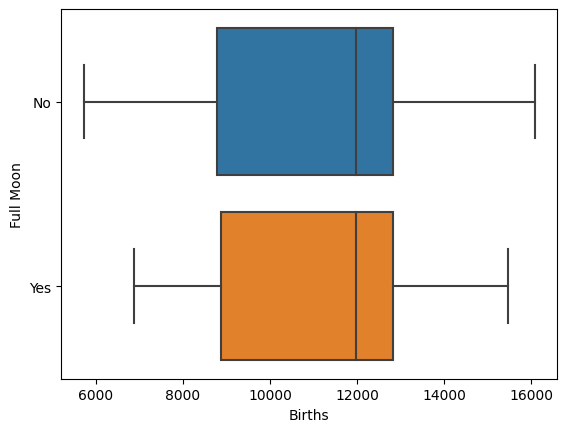

In [35]:
sns.boxplot(babymoons_df, x='Births', y='Full Moon')